In [132]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy import spatial
import math
from sklearn.metrics import jaccard_score
import familiarization as fm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# Load the benign, malicious and modified malicious data sets after a training of 50 epochs
data_benign_r1 = pd.read_csv('data/run1/benign.dat', header=None, sep=',')
print("Benign data loaded")
data_mal_r1 = pd.read_csv('data/run1/malicious.dat', header=None, sep=',')
print("Malicious data loaded")
data_mal_mod_r1 = pd.read_csv('data/run1/malicious_modified.dat', header=None, sep=',')
print("Malicious modified data loaded")

Benign data loaded
Malicious data loaded
Malicious modified data loaded


In [130]:
# Load the benign, malicious and modified malicious data sets after training 50 epochs twice, including loaded model weights
data_benign_r3 = pd.read_csv('data/run3/benign.dat', header=None, sep=',')
print("Benign data loaded")
data_mal_r3 = pd.read_csv('data/run3/malicious.dat', header=None, sep=',')
print("Malicious data loaded")
data_mal_mod_r3 = pd.read_csv('data/run3/malicious_modified.dat', header=None, sep=',')
print("Malicious modified data loaded")

Benign data loaded
Malicious data loaded
Malicious modified data loaded


In [39]:
# Compute the differences between benign and malicious run 1
# Compute the summation of each column/feature
sum_column_benign = data_benign_r1.sum(axis = 0, skipna = True)
sum_column_mal = data_mal_r1.sum(axis = 0, skipna = True)

# Difference between benign and malicious
diff_benign_mal = abs(sum_column_benign - sum_column_mal)
diff_benign_mal = diff_benign_mal.sort_values(ascending=False)

# Define limit for plot
limit_top_x = 10

# Create dataframe for plotting
plot_one_df_benign = pd.DataFrame()
plot_one_df_mal = pd.DataFrame()
columns = []
for i in range(0, limit_top_x):
    cur_feature_name = diff_benign_mal.index[i]
    columns.append(cur_feature_name)
    plot_one_df_benign[cur_feature_name] = data_benign_r1[cur_feature_name] 
    plot_one_df_mal[cur_feature_name] = data_mal_r1[cur_feature_name] 

In [40]:
# Compute the differences between malicious and adversarial run 1
# Compute the summation of each column/feature
sum_column_mal = data_mal_r1.sum(axis = 0, skipna = True)
sum_column_mal_mod = data_mal_mod_r1.sum(axis = 0, skipna = True)

# Difference between benign and malicious
diff_mal_and_mod = abs(sum_column_mal - sum_column_mal_mod)
diff_mal_and_mod = diff_mal_and_mod.sort_values(ascending=False)

# Define limit for plot
limit_top_x = 10

# Create dataframe for plotting
plot_two_df_mal = pd.DataFrame()
plot_two_df_mal_mod = pd.DataFrame()
columns = []
for i in range(0, limit_top_x):
    cur_feature_name = diff_mal_and_mod.index[i]
    columns.append(cur_feature_name)
    plot_two_df_mal[cur_feature_name] = data_mal_r1[cur_feature_name] 
    plot_two_df_mal_mod[cur_feature_name] = data_mal_mod_r1[cur_feature_name] 


In [43]:
# Compute the differences between benign and adversarial run 1
# Compute the summation of each column/feature
sum_column_benign = data_benign_r1.sum(axis = 0, skipna = True)
sum_column_mal_mod = data_mal_mod_r1.sum(axis = 0, skipna = True)

# Difference between benign and malicious
diff_benign_and_mod = abs(sum_column_benign - sum_column_mal_mod)
diff_benign_and_mod = diff_benign_and_mod.sort_values(ascending=False)

# Define limit for plot
limit_top_x = 10

# Create dataframe for plotting
plot_three_df_benign = pd.DataFrame()
plot_three_df_mal_mod = pd.DataFrame()
columns = []
for i in range(0, limit_top_x):
    cur_feature_name = diff_benign_and_mod.index[i]
    columns.append(cur_feature_name)
    plot_three_df_benign[cur_feature_name] = data_benign_r1[cur_feature_name] 
    plot_three_df_mal_mod[cur_feature_name] = data_mal_mod_r1[cur_feature_name] 



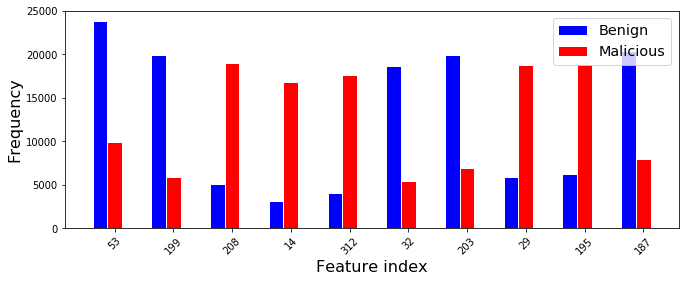

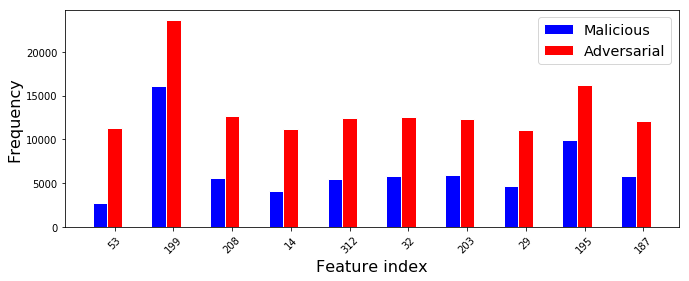

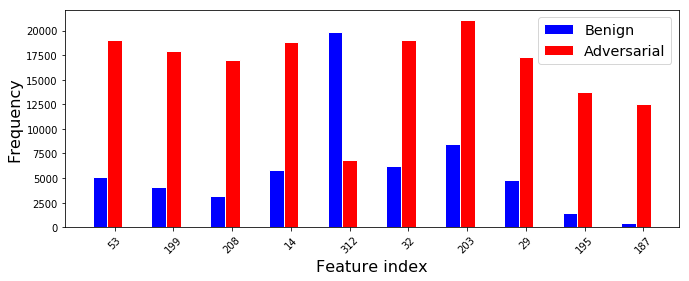

In [63]:
# plot the differences
fm.bar_plot(plot_one_df_benign, plot_one_df_mal, columns, "Benign", "Malicious")
fm.bar_plot(plot_two_df_mal, plot_two_df_mal_mod, columns, "Malicious", "Adversarial")
fm.bar_plot(plot_three_df_benign, plot_three_df_mal_mod, columns, "Benign", "Adversarial")

In [133]:
# Compute the differences between benign and malicious run 3
# Compute the summation of each column/feature
sum_column_benign = data_benign_r3.sum(axis = 0, skipna = True)
sum_column_mal = data_mal_r3.sum(axis = 0, skipna = True)

# Difference between benign and malicious
diff_benign_mal = abs(sum_column_benign - sum_column_mal)
diff_benign_mal = diff_benign_mal.sort_values(ascending=False)

# Define limit for plot
limit_top_x = 10

# Create dataframe for plotting
plot_one_df_benign = pd.DataFrame()
plot_one_df_mal = pd.DataFrame()
columns = []
for i in range(0, limit_top_x):
    cur_feature_name = diff_benign_mal.index[i]
    columns.append(cur_feature_name)
    plot_one_df_benign[cur_feature_name] = data_benign_r3[cur_feature_name] 
    plot_one_df_mal[cur_feature_name] = data_mal_r3[cur_feature_name] 

In [134]:
# Compute the differences between malicious and adversarial run 3
# Compute the summation of each column/feature
sum_column_mal = data_mal_r3.sum(axis = 0, skipna = True)
sum_column_mal_mod = data_mal_mod_r3.sum(axis = 0, skipna = True)

# Difference between benign and malicious
diff_mal_and_mod = abs(sum_column_mal - sum_column_mal_mod)
diff_mal_and_mod = diff_mal_and_mod.sort_values(ascending=False)

# Define limit for plot
limit_top_x = 10

# Create dataframe for plotting
plot_two_df_mal = pd.DataFrame()
plot_two_df_mal_mod = pd.DataFrame()
columns = []
for i in range(0, limit_top_x):
    cur_feature_name = diff_mal_and_mod.index[i]
    columns.append(cur_feature_name)
    plot_two_df_mal[cur_feature_name] = data_mal_r3[cur_feature_name] 
    plot_two_df_mal_mod[cur_feature_name] = data_mal_mod_r3[cur_feature_name] 



In [135]:
# Compute the differences between benign and adversarial run 3
# Compute the summation of each column/feature
sum_column_benign = data_benign_r3.sum(axis = 0, skipna = True)
sum_column_mal_mod = data_mal_mod_r3.sum(axis = 0, skipna = True)

# Difference between benign and malicious
diff_benign_and_mod = abs(sum_column_benign - sum_column_mal_mod)
diff_benign_and_mod = diff_benign_and_mod.sort_values(ascending=False)

# Define limit for plot
limit_top_x = 10

# Create dataframe for plotting
plot_three_df_benign = pd.DataFrame()
plot_three_df_mal_mod = pd.DataFrame()
columns = []
for i in range(0, limit_top_x):
    cur_feature_name = diff_benign_and_mod.index[i]
    columns.append(cur_feature_name)
    plot_three_df_benign[cur_feature_name] = data_benign_r3[cur_feature_name] 
    plot_three_df_mal_mod[cur_feature_name] = data_mal_mod_r3[cur_feature_name] 




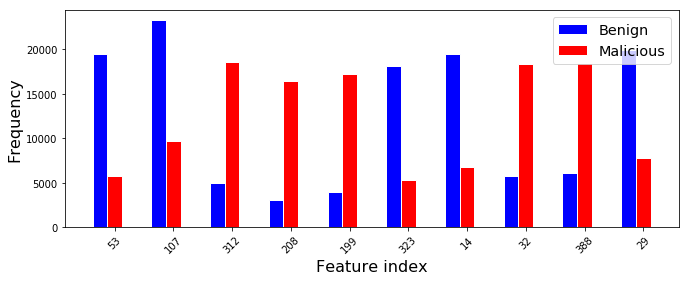

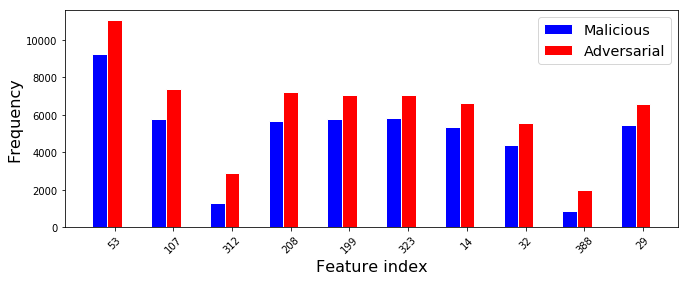

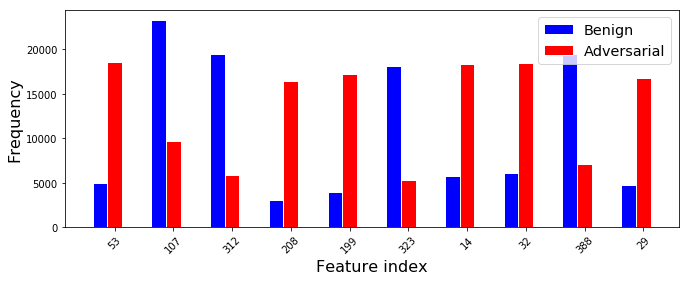

In [136]:
# plot the differences
fm.bar_plot(plot_one_df_benign, plot_one_df_mal, columns, "Benign", "Malicious")
fm.bar_plot(plot_two_df_mal, plot_two_df_mal_mod, columns, "Malicious", "Adversarial")
fm.bar_plot(plot_three_df_benign, plot_three_df_mal_mod, columns, "Benign", "Adversarial")

In [137]:
# run 1
mean_benign_r1 = list()
mean_mal_r1 = list()
mean_mal_mod_r1 = list()

for i in range(len(data_benign_r1.columns)):
    mean_benign_r1.append(data_benign_r1[i].sum())
    mean_mal_r1.append(data_mal_r1[i].sum())
    mean_mal_mod_r1.append(data_mal_mod_r1[i].sum())
    
    
# run 3
mean_benign_r3 = list()
mean_mal_r3 = list()
mean_mal_mod_r3 = list()

for i in range(len(data_benign_r3.columns)):
    mean_benign_r3.append(data_benign_r3[i].sum())
    mean_mal_r3.append(data_mal_r3[i].sum())
    mean_mal_mod_r3.append(data_mal_mod_r3[i].sum())
    

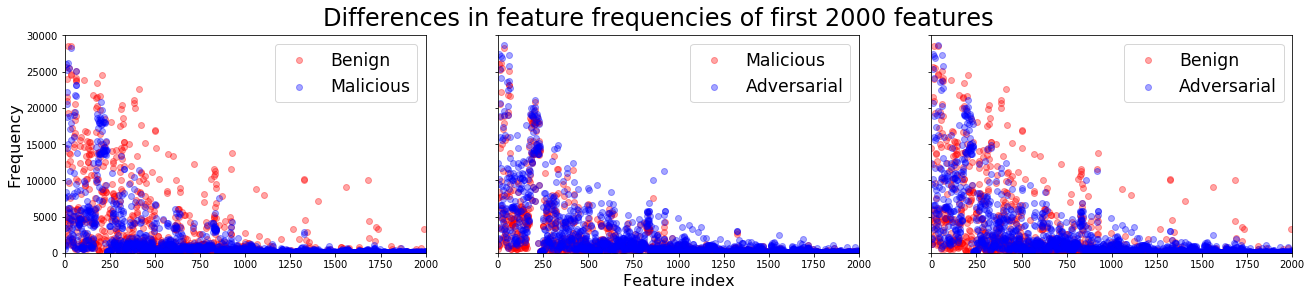

In [138]:
# Plot the differences on all features run 1

r = range(0,len(mean_benign_r1))
fig,ax = plt.subplots(ncols=3,figsize=(22,4),sharex=True, sharey=True)

fig.suptitle("Differences in feature frequencies of first 2000 features", size='24')
ax[0].scatter(r, mean_benign_r1, color='red', label='Benign', alpha=0.35)
ax[0].scatter(r, mean_mal_r1, color='blue', label='Malicious', alpha=0.35)
ax[0].set_ylabel("Frequency", size='16')
ax[0].set_xlim([0, 2000])
ax[0].set_ylim([0,30000])
ax[0].legend(loc='upper right', fontsize='xx-large')

ax[1].scatter(r, mean_mal_r1, color='red', label='Malicious', alpha=0.35)
ax[1].scatter(r, mean_mal_mod_r1, color='blue', label='Adversarial', alpha=0.35)
ax[1].set_xlim([0, 2000])
ax[1].set_xlabel("Feature index", size='16')
ax[1].set_ylim([0,30000])
ax[1].legend(loc='upper right', fontsize='xx-large')

ax[2].scatter(r, mean_benign_r1, color='red', label='Benign', alpha=0.35)
ax[2].scatter(r, mean_mal_mod_r1, color='blue', label='Adversarial', alpha=0.35)
ax[2].set_xlim([0, 2000])
ax[2].set_ylim([0,30000])
ax[2].legend(loc='upper right', fontsize='xx-large')

# plt.tight_layout()
plt.show()

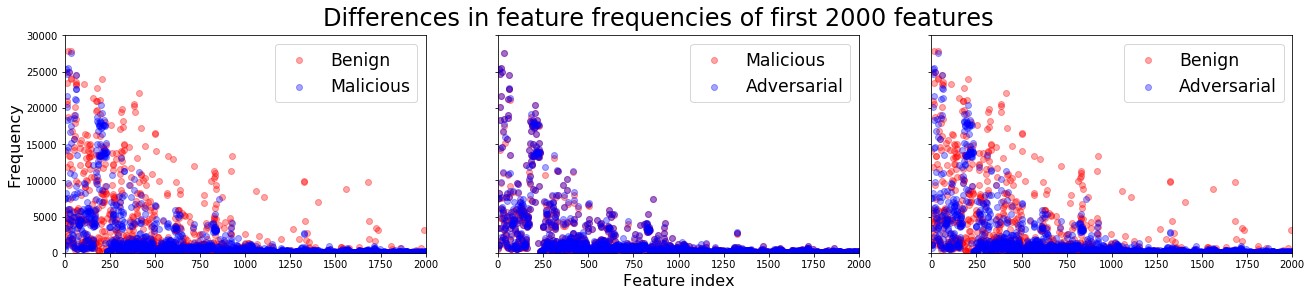

In [139]:
# Plot the differences on all features run 3

r = range(0,len(mean_benign_r3))
fig,ax = plt.subplots(ncols=3,figsize=(22,4),sharex=True, sharey=True)

fig.suptitle("Differences in feature frequencies of first 2000 features", size='24')
ax[0].scatter(r, mean_benign_r3, color='red', label='Benign', alpha=0.35)
ax[0].scatter(r, mean_mal_r3, color='blue', label='Malicious', alpha=0.35)
ax[0].set_ylabel("Frequency", size='16')
ax[0].set_xlim([0, 2000])
ax[0].set_ylim([0,30000])
ax[0].legend(loc='upper right', fontsize='xx-large')

ax[1].scatter(r, mean_mal_r3, color='red', label='Malicious', alpha=0.35)
ax[1].scatter(r, mean_mal_mod_r3, color='blue', label='Adversarial', alpha=0.35)
ax[1].set_xlim([0, 2000])
ax[1].set_xlabel("Feature index", size='16')
ax[1].set_ylim([0,30000])
ax[1].legend(loc='upper right', fontsize='xx-large')

ax[2].scatter(r, mean_benign_r3, color='red', label='Benign', alpha=0.35)
ax[2].scatter(r, mean_mal_mod_r3, color='blue', label='Adversarial', alpha=0.35)
ax[2].set_xlim([0, 2000])
ax[2].set_ylim([0,30000])
ax[2].legend(loc='upper right', fontsize='xx-large')

# plt.tight_layout()
plt.show()